In [1]:
import pandas as pd 
import seaborn as sns
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [2]:
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [4]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)

In [5]:
df.head(5)

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No


In [6]:
df.dropna(how='all', inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

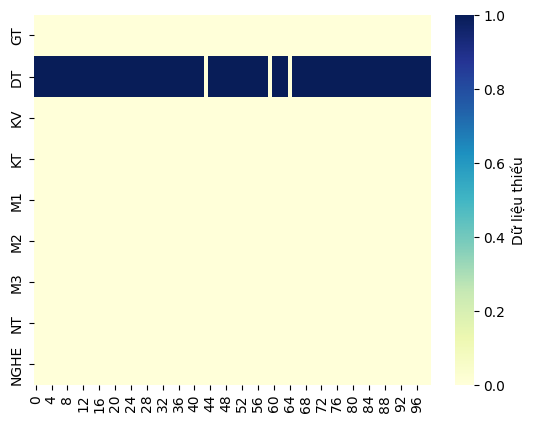

In [ ]:
# Vẽ biểu đồ nhiệt (heatmap) hiển thị dữ liệu thiếu trong DataFrame
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})

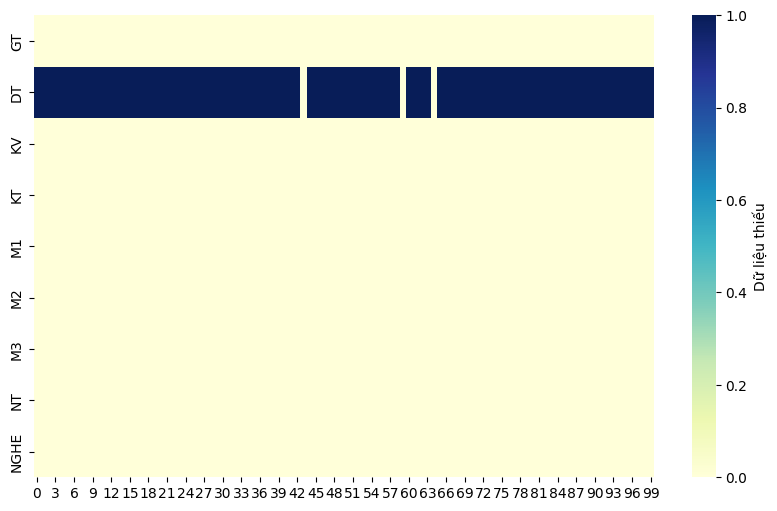

In [ ]:
#  tạo và lưu một biểu đồ heatmap để trực quan hóa dữ liệu thiếu trong DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [12]:
df['DT'].fillna('KINH', inplace=True)

C:\Users\thegi\AppData\Local\Temp\ipykernel_23380\466813610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\thegi\AppData\Local\Temp\ipykernel_23380\466813610.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)


In [13]:
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df

C:\Users\thegi\AppData\Local\Temp\ipykernel_23380\1602588696.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['M1'].fillna(df['M1'].mean(), inplace=True)
C:\Users\thegi\AppData\Local\Temp\ipykernel_23380\1602588696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,GT,DT,KV,KT,M1,M2,M3,NT,NGHE,TBM
0,F,KINH,2NT,A1,3.25,3.25,4.50,12/7/2018,No,3.666667
1,M,KINH,1,C,6.00,4.00,3.50,12/7/2018,Yes,4.500000
2,M,KINH,1,C,5.00,6.75,4.00,12/7/2018,No,5.250000
3,M,KINH,1,D1,4.25,4.25,5.25,12/7/2018,No,4.583333
4,M,KINH,2NT,A,4.25,4.50,5.00,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...
95,F,KINH,1,C,5.25,1.50,6.25,7/20/2022,Yes,4.333333
96,F,KINH,1,C,5.25,3.75,4.75,7/20/2022,No,4.583333
97,M,KINH,2NT,C,7.00,8.00,4.00,7/20/2022,Yes,6.333333
98,M,KINH,1,C,5.00,3.50,5.50,7/20/2022,No,4.666667


In [ ]:
print(f'{df["M1"].min()}\n{df["M1"].max()}\n')

# tính trung bình
# Tính trung vị (median)
print(f'{df["M1"].mean()}\n{df["M1"].median()}\n')

print(f'{df["KT"].mode()}\n')
print(f'{df["M1"].quantile(0.25)}\n')


1.0
7.0

3.74
3.625

0    A
Name: KT, dtype: object

2.5



In [ ]:
# Tính khoảng giá trị (range):
# Range=Maximum−Minimum
df['M1'].max() - df['M1'].min()

np.float64(6.0)

In [ ]:
# tính IQR (Interquartile Range) của cột M1 trong DataFrame df
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

np.float64(2.25)

In [22]:
# tính độ lệch tuyệt đối trung bình (Mean Absolute Deviation - MAD) của cột M1 trong DataFrame df
import numpy as np
np.mean(np.abs(df['M1'] - np.mean(df['M1'])))

np.float64(1.1600000000000001)

In [ ]:
# tính phạm vi (range) cho từng cột M1 và M2 trong DataFrame df
df[['M1','M2']].max() - df[['M1','M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [ ]:
# Tính phương sai
df['M1'].var()

np.float64(2.0289393939393943)

In [ ]:
# Tính độ lệch chuẩn (standard deviation) của cột M1 trong DataFrame
df['M1'].std()

np.float64(1.424408436488423)

In [26]:
print(df[['M1','M2']].mean())
print(df[['M1','M2']].std())

M1    3.740
M2    4.255
dtype: float64
M1    1.424408
M2    1.060053
dtype: float64


In [ ]:
# tính tỷ lệ độ lệch chuẩn trên trung bình (coefficient of variation - CV) cho các cột M1 và M2 
df[['M1','M2']].std()/df[['M1','M2']].mean()

M1    0.380858
M2    0.249131
dtype: float64

In [ ]:
# bản tóm tắt thống kê cơ bản
df['M1'].describe()

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: M1, dtype: float64

In [29]:
df[['M1','M2','M3']].describe()

,M1,M2,M3
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [30]:
cv = df[['M1','M2','M3']].std() / df[['M1','M2','M3']].mean()
list(cv)


[0.3808578707188297, 0.2491311130540305, 0.2135664058628459]

In [ ]:
# thực hiện việc nhóm dữ liệu trong DataFrame df theo cột GT (giới tính), sau đó tính các thống kê mô tả cho cột M1 trong từng nhóm
df.groupby('GT')['M1'].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [32]:
df.groupby('GT')['M2'].std()/df.groupby('GT')['M2'].mean()

GT
F    0.252518
M    0.240146
Name: M2, dtype: float64

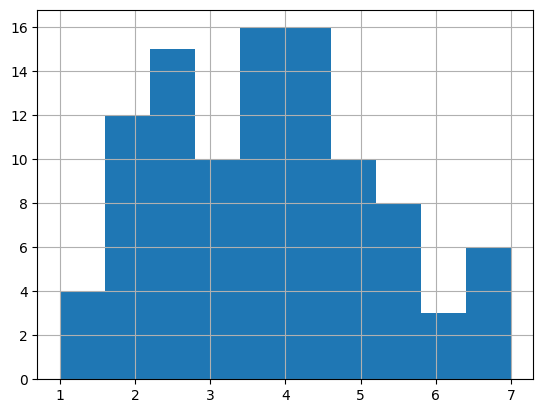

In [ ]:
# vẽ một biểu đồ histogram cho cột M1
# Histogram là một biểu đồ biểu diễn phân bố tần suất (frequency distribution) của các giá trị trong cột.
df['M1'].hist()
plt.show()

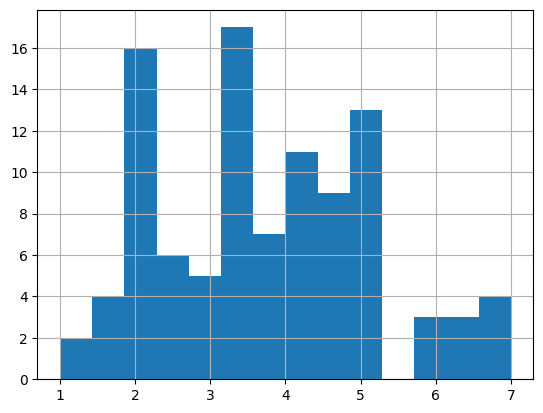

In [ ]:
# số lượng 14 bin (phạm vi giá trị chia thành 14 phần).
df['M1'].hist(bins=14)
plt.show()

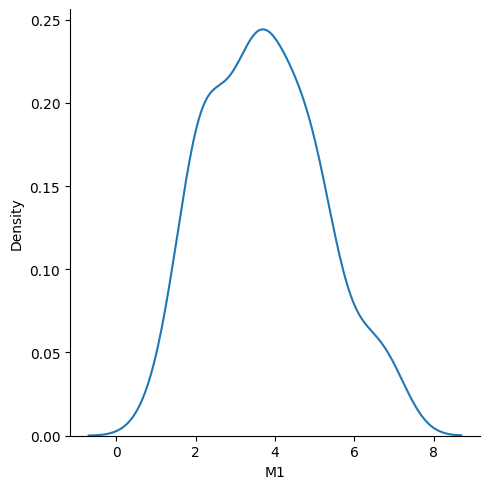

In [ ]:
# vẽ một đồ thị KDE (Kernel Density Estimate) cho cột M1 trong DataFrame df. 
# KDE là một kỹ thuật ước lượng mật độ xác suất không tham số, giúp bạn hiểu phân bố của dữ liệu theo cách mượt mà hơn so với biểu đồ histogram.
# Chỉ định loại đồ thị là KDE (Kernel Density Estimate
sns.displot(df, x='M1', kind='kde')
plt.show()


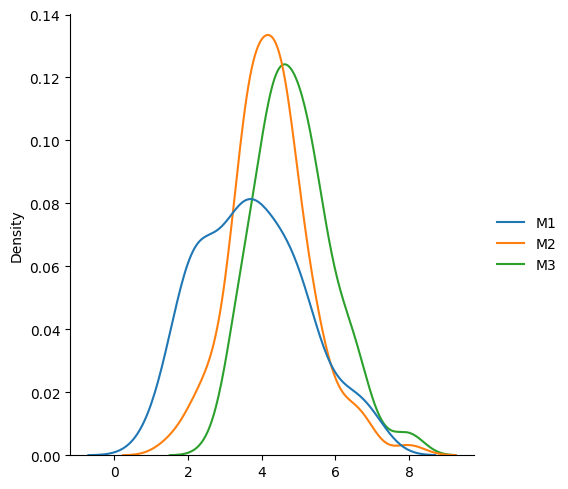

In [36]:
sns.displot(data = df[['M1','M2','M3']], kind='kde')
plt.show()

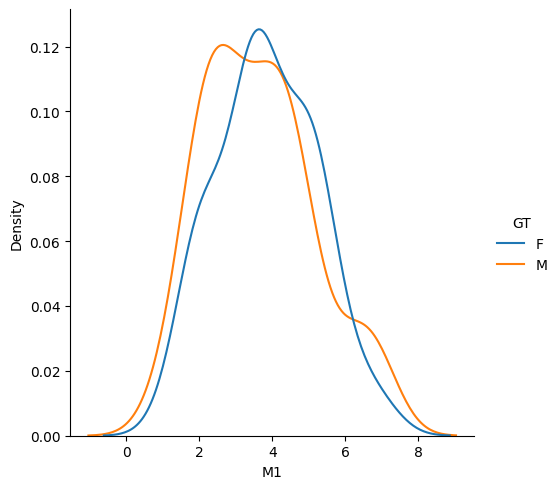

In [ ]:
# vẽ một đồ thị KDE (Kernel Density Estimate) cho cột M1 trong DataFrame df, với phân loại màu sắc theo cột GT
# df: DataFrame chứa dữ liệu mà bạn muốn vẽ đồ thị.
# x='M1': Chỉ định rằng cột M1 trong DataFrame df là dữ liệu được sử dụng để vẽ đồ thị.
# hue='GT': Đây là đối số giúp phân biệt các nhóm theo cột GT. Mỗi nhóm sẽ có một đường cong KDE riêng biệt, với màu sắc khác nhau.

sns.displot(df, x='M1', hue='GT', kind='kde')
plt.show()


In [ ]:
# tính toán độ lệch (skewness) của dữ liệu trong cột M1 của DataFrame df.
# Skewness là một chỉ số thống kê dùng để đo độ lệch của phân phối dữ liệu so với phân phối chuẩn (normal distribution).
# Dương (positive skew): Dữ liệu có đuôi dài về phía giá trị lớn hơn (phân phối lệch phải). Phần lớn dữ liệu tập trung ở phía dưới của biểu đồ.
# Âm (negative skew): Dữ liệu có đuôi dài về phía giá trị nhỏ hơn (phân phối lệch trái). Phần lớn dữ liệu tập trung ở phía trên của biểu đồ.
# Bằng 0: Phân phối gần như đối xứng, tương tự phân phối chuẩn
df['M1'].skew()

np.float64(0.33322084231625376)

In [39]:
df[['M1','M2','M3']].skew()

M1    0.333221
M2    0.472551
M3    0.607063
dtype: float64

In [ ]:
# tính độ nhọn (kurtosis) của các cột M1, M2, và M3 trong DataFrame df
# Kurtosis là một chỉ số thống kê dùng để mô tả hình dạng của phân phối dữ liệu, đặc biệt là sự "nhọn" hoặc "phẳng" của đỉnh phân phối.
# Kurtosis cao (Kurtosis > 3): Phân phối có đỉnh nhọn và có nhiều giá trị ngoại lệ (heavy-tailed).
# Kurtosis thấp (Kurtosis < 3): Phân phối có đỉnh phẳng và ít giá trị ngoại lệ (light-tailed).
# Kurtosis = 3: Phân phối chuẩn (normal distribution) có kurtosis bằng 3.
df[['M1','M2','M3']].kurtosis()

M1   -0.517004
M2    1.372439
M3    0.442173
dtype: float64

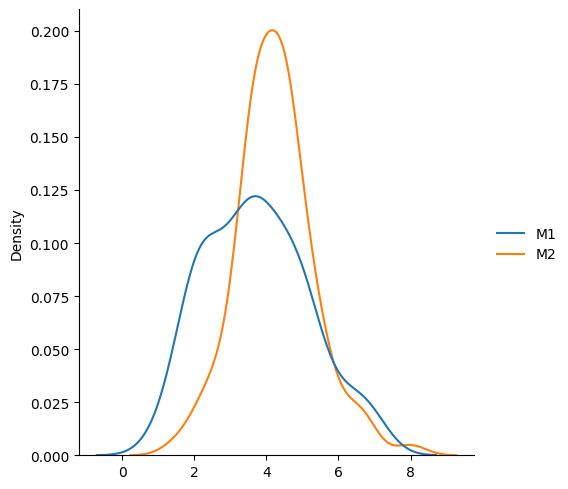

In [41]:
sns.displot(data = df[['M1','M2']], kind='kde')
plt.show()

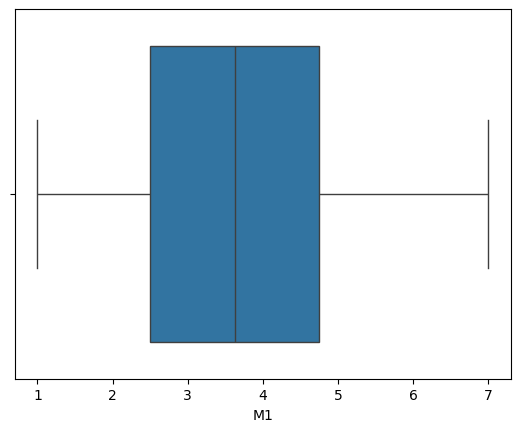

In [ ]:
# một biểu đồ hộp (boxplot) theo chiều ngang (horizontal) cho dữ liệu trong cột M1 của DataFrame df
# Biểu đồ hộp (boxplot) sẽ hiển thị thông tin về phân phối dữ liệu của cột M1
# Dải giá trị (box): Từ phần tử thứ nhất (Q1) đến phần tử thứ ba (Q3), bao gồm 75% dữ liệu.
# Đường giữa (median): Đường nằm trong hộp, thể hiện giá trị trung vị của dữ liệu.
# Các phần tử ngoại lệ (outliers): Những điểm nằm ngoài các giới hạn của hộp sẽ được thể hiện bằng các dấu hiệu đặc biệt (như dấu chấm)
sns.boxplot(data=df['M1'], orient="h")
plt.show()

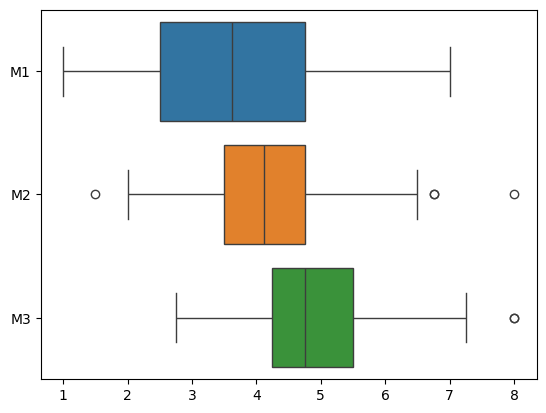

In [ ]:
# một biểu đồ hộp (boxplot) theo chiều ngang để thể hiện phân phối dữ liệu của các cột M1, M2, và M3
sns.boxplot(data=df[['M1','M2','M3']], orient='h')
plt.show()

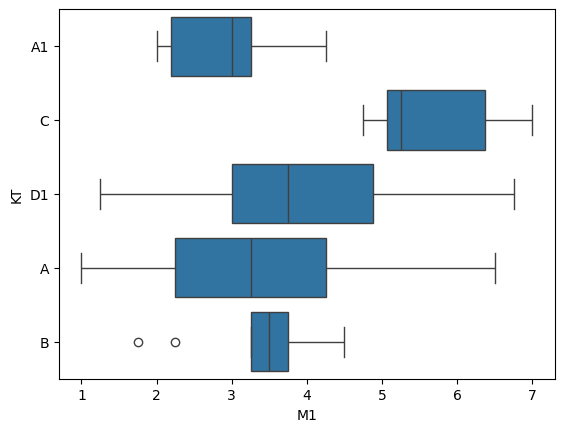

In [ ]:
# x='M1': Cột M1 được sử dụng để vẽ biểu đồ hộp theo trục x.
# y='KT': Cột KT được sử dụng làm phân nhóm cho các giá trị của M1.
#  Điều này có nghĩa là mỗi giá trị của KT sẽ tạo ra một nhóm riêng biệt, và biểu đồ hộp sẽ được vẽ cho từng nhóm KT dựa trên giá trị của M1.
# orient='h': Tham số orient='h' chỉ định biểu đồ hộp được vẽ theo chiều ngang (horizontal). 
# Nếu tham số này được thay đổi thành 'v', biểu đồ sẽ được vẽ theo chiều dọc (vertical).
sns.boxplot(x='M1', y='KT',data=df, orient='h')
plt.show()

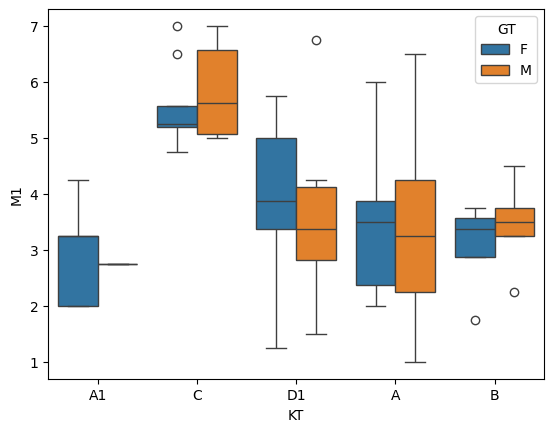

In [ ]:
# một biểu đồ hộp để so sánh phân phối của M1 giữa các nhóm KT, với mỗi nhóm GT được phân biệt bằng màu sắc khác nhau.
# Biểu đồ sẽ hiển thị các hộp (box) cho M1 tại mỗi giá trị của GT
# x='KT' là trục x biểu thị các giá trị của cột KT.
# y='M1' là trục y biểu thị các giá trị của cột M1.
# hue='GT' phân chia dữ liệu theo nhóm cột GT với các màu sắc khác nhau cho mỗi nhóm.
# data=df sử dụng dữ liệu từ DataFrame df.
sns.boxplot(x='KT', y='M1',hue='GT',data=df)
plt.show()

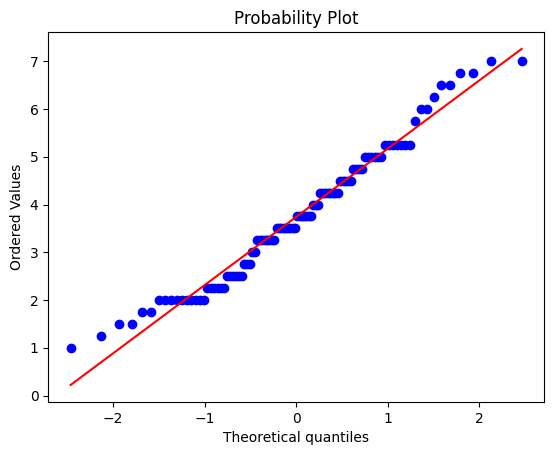

In [ ]:
# một biểu đồ phân phối xác suất (probability plot) cho dữ liệu trong cột M1 của DataFrame df
# Tham số này sử dụng sns.mpl.pyplot (tức là Matplotlib thông qua Seaborn) để vẽ biểu đồ
# Biểu đồ phân phối xác suất sẽ hiển thị các điểm dữ liệu của M1 so với phân phối chuẩn.
#  Nếu dữ liệu tuân theo phân phối chuẩn, các điểm sẽ nằm gần hoặc trên đường chéo.
#  Nếu dữ liệu lệch khỏi phân phối chuẩn, các điểm sẽ lệch khỏi đường chéo.
from scipy import stats
stats.probplot(df['M1'],plot=sns.mpl.pyplot)
plt.show()

In [ ]:
# ính toán ma trận hiệp phương sai (covariance matrix) giữa hai cột M1 và M2 trong DataFrame df.
df[['M1','M2']].cov()

,M1,M2
M1,2.028939,0.053081
M2,0.053081,1.123712


In [ ]:
# tính toán ma trận tương quan (correlation matrix) giữa hai cột M1 và M2 trong DataFrame df.
df[['M1','M2']].corr()

,M1,M2
M1,1.000000,0.035154
M2,0.035154,1.000000


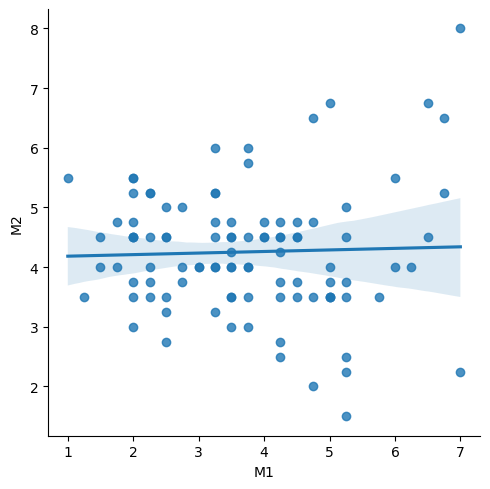

In [ ]:
# biểu đồ phân tán (scatter plot) với một đường hồi quy (regression line) được vẽ trên đó, mô phỏng mối quan hệ giữa hai biến M1 và M2 trong DataFrame df
# data=df: Dữ liệu từ DataFrame df sẽ được sử dụng để vẽ biểu đồ.
# x='M1': Biến trên trục hoành (x-axis) sẽ là cột M1.
# y='M2': Biến trên trục tung (y-axis) sẽ là cột M2.
# fit_reg=True: Bật tính năng vẽ đường hồi quy (regression line). Nếu tham số này là True, Seaborn sẽ tự động vẽ một đường hồi quy tuyến tính cho dữ liệu
sns.lmplot(data=df, x='M1', y='M2', fit_reg=True)
plt.show()

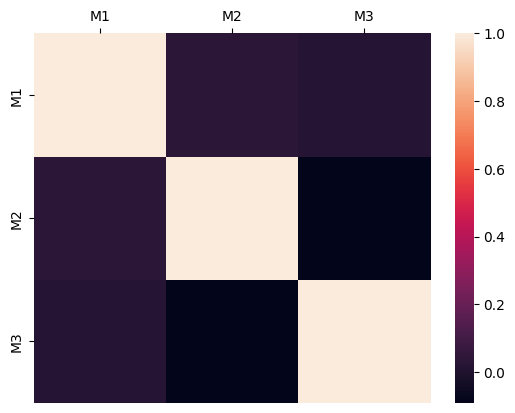

In [ ]:
# Tính toán ma trận tương quan (correlation matrix) giữa các cột đã chọn (M1, M2, và M3)
df[['M1','M2','M3']].corr()

# Vẽ biểu đồ heatmap (biểu đồ nhiệt) cho ma trận tương quan, nơi các giá trị tương quan được hiển thị dưới dạng màu sắc trong ma trận
# vmax=1.0: Đặt giá trị cực đại của thang màu là 1.0, tức là giá trị tương quan cao nhất (hoàn toàn tương quan) sẽ được hiển thị bằng màu mạnh nhất.
# square=False: Đảm bảo rằng ma trận không phải là hình vuông, tức là chiều rộng và chiều cao có thể khác nhau.
# .xaxis.tick_top(): Đặt các chỉ số (tick labels) của trục x ở phía trên của heatmap thay vì ở dưới (mặc định là dưới). 
#   Điều này giúp cải thiện tính thẩm mỹ hoặc làm cho biểu đồ dễ đọc hơn trong một số trường hợp
sns.heatmap(df[['M1','M2','M3']].corr(), vmax=1.0, square=False).xaxis.tick_top()

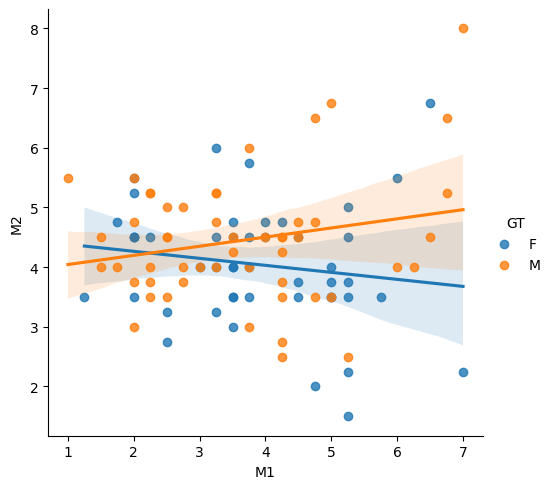

In [ ]:
# vẽ một biểu đồ phân tán (scatter plot) với một đường hồi quy (regression line) cho mối quan hệ giữa hai biến M1 và M2, phân biệt các nhóm dựa trên biến GT
# fit_reg=True: Yêu cầu vẽ một đường hồi quy tuyến tính cho mối quan hệ giữa M1 và M2. Nếu tham số này là True, 
# một đường hồi quy sẽ được vẽ qua các điểm dữ liệu để thể hiện mối quan hệ tuyến tính giữa hai biến.
# Khi các điểm dữ liệu phân bố xa khỏi đường hồi quy, 
# điều này có thể cho thấy rằng mối quan hệ giữa các biến là không tuyến tính hoặc có những yếu tố nhiễu hoặc ngoại lệ trong dữ liệu.
sns.lmplot(data=df, x='M1', y='M2',hue='GT', fit_reg=True)
plt.show()

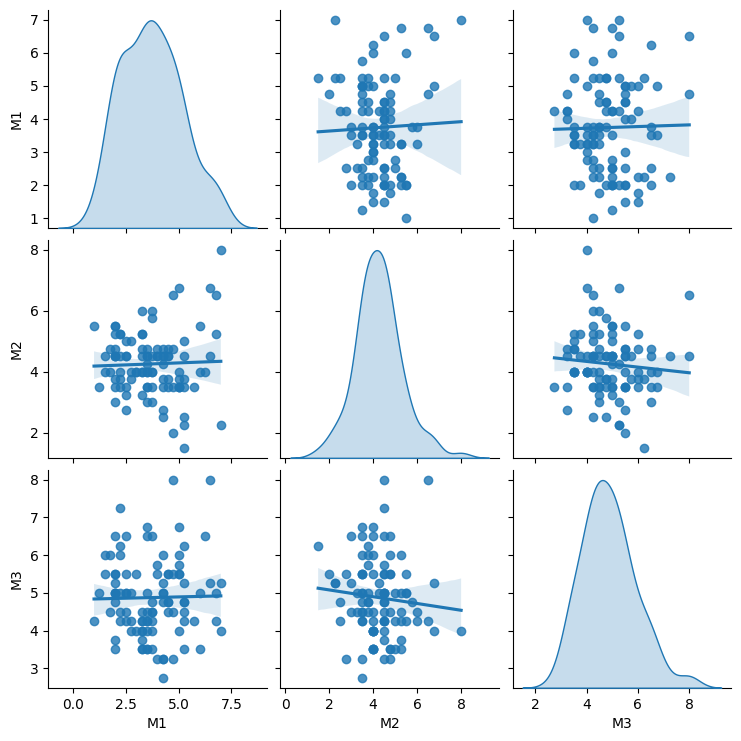

In [ ]:
# tạo ra một ma trận biểu đồ cặp (pairplot) cho ba biến M1, M2, và M3 trong DataFrame df
# diag_kind='kde': Điều này chỉ định rằng biểu đồ đường phân phối (KDE, Kernel Density Estimate) sẽ được vẽ trên các đường chéo của ma trận
# kind='reg': Chỉ ra rằng các biểu đồ ngoài đường chéo sẽ là biểu đồ phân tán (scatter plot) với một đường hồi quy tuyến tính được vẽ trên đó
sns.pairplot(df[['M1','M2','M3']],diag_kind='kde', kind='reg')
plt.show()

In [53]:
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')

df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [55]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']

1     6.00
2     5.00
6     6.50
22    5.00
23    6.75
24    7.00
25    4.75
26    5.25
27    5.25
95    5.25
96    5.25
97    7.00
98    5.00
99    5.25
Name: M1, dtype: float64

In [56]:
dfKhoiC['M1'].describe()

count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

In [ ]:
#  kiểm định t một mẫu (one-sample t-test) để kiểm tra xem giá trị trung bình của cột M1 trong DataFrame 
# dfKhoiC có khác biệt đáng kể so với một giá trị trung bình đã biết, trong trường hợp này là popmean=4.0
# VD: Kết quả của stats.ttest_1samp sẽ trả về một tuple gồm hai giá trị:

# T-statistic: Giá trị thống kê t, đo lường mức độ khác biệt giữa trung bình của mẫu và giá trị trung bình giả định.
# P-value: Xác suất để nhận được một t-statistic cực đoan (hoặc hơn) như vậy nếu giả thuyết không đúng.
# Nếu p-value nhỏ hơn mức ý nghĩa (thường là 0.05), bạn có thể bác bỏ giả thuyết không (H₀), tức là trung bình của mẫu khác biệt đáng kể với giá trị giả định.
# Nếu p-value lớn hơn mức ý nghĩa, bạn không thể bác bỏ giả thuyết không (H₀), tức là không có bằng chứng đủ mạnh để khẳng định rằng trung bình của mẫu khác biệt với giá trị giả định.

# P-value rất nhỏ (3.63e-06, tức là 0.00000363) cho thấy rằng có rất ít khả năng rằng sự khác biệt giữa trung bình mẫu và giá trị giả định là do ngẫu nhiên. 
# Điều này cung cấp bằng chứng mạnh mẽ để bác bỏ giả thuyết không (H₀).
import scipy.stats as stats

stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)


TtestResult(statistic=np.float64(7.650519779016341), pvalue=np.float64(3.6339826927369557e-06), df=np.int64(13))

In [58]:
dfKhoiC = df.loc[df['KT'] == 'C']
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)

TtestResult(statistic=np.float64(2.5331368604654054), pvalue=np.float64(0.017676922552296807), df=np.float64(26.0))

In [ ]:
# df['M1'] là mẫu dữ liệu bạn muốn kiểm tra.
# value=8.0 là giá trị trung bình giả định mà bạn muốn kiểm tra xem liệu nó có khác biệt đáng kể so với trung bình của mẫu hay không.
# giá trị p này rất nhỏ, do đó bạn có thể bác bỏ giả thuyết không (H₀) và kết luận rằng trung bình mẫu của bạn khác biệt đáng kể so với 8.0.
from statsmodels.stats.weightstats import ztest as ztest
ztest(df['M1'], value=8.0)


(np.float64(-29.907152266677993), np.float64(1.588509177330612e-196))

In [ ]:
# vì p-value < 0.05, bạn có thể bác bỏ giả thuyết không (H₀) và kết luận rằng trung bình mẫu của bạn khác biệt có ý nghĩa so với giá trị giả định 8.0.
ztest(df['M1'], df['M2'], value=0)

(np.float64(-2.9004757923795), np.float64(0.0037259661678783573))

In [ ]:
# Hệ số tương quan Pearson đo lường mức độ và hướng của mối quan hệ tuyến tính giữa hai biến.
# p-value: Giá trị p, cho biết mức độ xác thực của hệ số tương quan này. Nếu p-value nhỏ hơn mức ý nghĩa (thường là 0.05),
#  bạn có thể kết luận rằng có mối quan hệ tuyến tính đáng kể giữa hai biến.
# r (Hệ số tương quan Pearson) có giá trị từ -1 đến 1:
# 1: Mối quan hệ tuyến tính hoàn hảo, đồng biến (cả hai tăng hoặc giảm cùng nhau).
# -1: Mối quan hệ tuyến tính hoàn hảo, nghịch biến (một tăng và một giảm).
# 0: Không có mối quan hệ tuyến tính giữa hai biến.

# Nếu p-value < 0.05, bạn có thể bác bỏ giả thuyết không và kết luận rằng có một mối quan hệ tuyến tính có ý nghĩa giữa M1 và M2.

from scipy.stats.stats import pearsonr

pearsonr(df['M1'], df['M2'])


C:\Users\thegi\AppData\Local\Temp\ipykernel_23380\1144690554.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=np.float64(0.03515405725785023), pvalue=np.float64(0.7284198928723625))

In [ ]:
#  bảng chéo (cross-tabulation) giữa hai cột GT và NGHE trong DataFrame df để xem phân phối tần suất của các giá trị trong hai biến này.
import scipy.stats as stats

crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
crosdata

NGHE,No,Yes
GT,,
F,23,25
M,32,20


In [ ]:
#  kiểm định Fisher Exact Test, một phương pháp thống kê được sử dụng khi mẫu dữ liệu nhỏ hoặc khi các tần suất trong bảng chéo rất thấp
# Odd ratio (odd_ratio): Tỷ lệ chênh lệch (odds ratio) của các kết hợp trong bảng chéo.
    # Nếu odd_ratio = 1, không có sự khác biệt giữa các nhóm.
    # Nếu odd_ratio > 1, có xu hướng xảy ra sự kiện hơn.
    # Nếu odd_ratio < 1, có xu hướng không xảy ra sự kiện hơn.
# P-value (p_value): Giá trị p của kiểm định, giúp xác định liệu mối quan hệ giữa hai biến có ý nghĩa thống kê hay không.
    # Nếu p-value < 0.05, bạn có thể bác bỏ giả thuyết không và kết luận rằng có sự liên hệ giữa hai biến.
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

# Kết luận
# Odd ratio = 0.575: Tỷ lệ chênh lệch này cho thấy có sự khác biệt giữa các nhóm trong bảng chéo, nhưng tỷ lệ này nhỏ hơn 1,
#  cho thấy có xu hướng thấp hơn đối với sự kiện trong một nhóm so với nhóm còn lại. Tức là nhóm "NGHE1" có khả năng xuất hiện ít hơn nhóm "NGHE2".
#  Tuy nhiên, giá trị odd ratio = 0.575 không phải là rất thấp, vì vậy sự khác biệt không phải là quá rõ rệt.

# P-value = 0.2276: Giá trị p này lớn hơn 0.05, điều này có nghĩa là không có đủ bằng chứng để bác bỏ giả thuyết không (H₀: không có sự liên kết giữa hai biến).
#  Điều này cho thấy rằng mối quan hệ giữa GT và NGHE không có ý nghĩa thống kê ở mức độ 5%.

odd ratio is : 0.575
p_value is : 0.22763927303454412


In [75]:
from scipy.stats import chi2_contingency

crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
crosdata

KT,A,A1,B,C,D1
KV,,,,,
1,29,2,8,8,13
2,9,0,0,2,8
2NT,11,4,1,4,1


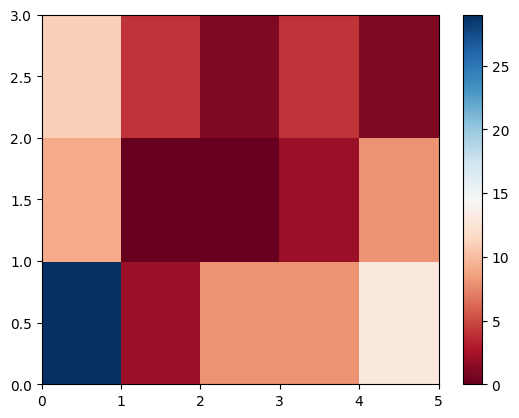

In [ ]:
# Đồ thị pcolor sẽ hiển thị một heatmap cho bảng chéo (crosdata). 
# Các giá trị trong bảng sẽ được chuyển thành các ô màu với các màu sắc khác nhau dựa trên giá trị của chúng, 
# giúp bạn dễ dàng nhận thấy các mô hình phân bố trong dữ liệu.
# Thanh màu (colorbar) sẽ cho biết mỗi màu tương ứng với một phạm vi giá trị nào trong bảng
import matplotlib.pyplot as plt
plt.pcolor(crosdata,cmap='RdBu')
plt.colorbar()
plt.show()

In [ ]:
# kiểm định Chi-square (chi-square test) trên bảng chéo crosdata để kiểm tra xem hai biến có phụ thuộc vào nhau hay không
stat, p, dof, expected = chi2_contingency(crosdata)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# kết luận
# Vì p-value (0.0201) nhỏ hơn alpha (0.05), bạn bác bỏ giả thuyết không (H₀).
# Điều này có nghĩa là hai biến (KV và KT) có sự phụ thuộc vào nhau. Bạn có thể kết luận rằng có mối quan hệ giữa các giá trị trong hai biến này.

p value is 0.02012461887796485
Dependent (reject H0)


In [ ]:
# Mô hình hồi quy tuyến tính (OLS - Ordinary Least Squares) được xây dựng để dự đoán giá trị của biến M1 từ biến phân loại GT. 
# Trong đó, M1 là biến phụ thuộc và GT là biến độc lập (biến phân loại).
import statsmodels.api as sm
from statsmodels.formula.api import ols

# anova_lm(model, typ=1): Thực hiện phân tích phương sai (ANOVA) cho mô hình hồi quy. 
# Phân tích phương sai dùng để kiểm tra sự khác biệt giữa các nhóm (ở đây là các nhóm trong biến GT) về giá trị của biến M1.
# typ=1: Xác định loại phân tích phương sai. typ=1 tương ứng với phân tích phương sai dựa trên hiệu số tổng thể giữa các nhóm (sum of squares).
model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
GT,1.0,1.203141,1.203141,0.590538,0.444059
Residual,98.0,199.661859,2.037366,NaN,NaN


In [ ]:
# Kết luận 
# p-value = 0.444059: Vì giá trị p lớn hơn 0.05, bạn không bác bỏ giả thuyết không (H₀). 
# Điều này có nghĩa là không có sự khác biệt có ý nghĩa thống kê giữa các nhóm trong biến GT về giá trị của M1.

# Sự biến động giữa các nhóm GT không lớn hơn nhiều so với biến động trong nhóm, do đó,
#  bạn không thể kết luận rằng có sự khác biệt đáng kể về giá trị của M1 giữa các nhóm trong GT.

In [ ]:
# mô hình hồi quy tuyến tính (OLS - Ordinary Least Squares) với biến độc lập M1 và biến phụ thuộc M3
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit() # Tạo một mô hình hồi quy tuyến tính (OLS) với y là biến phụ thuộc và X_with_constant là ma trận các biến độc lập (bao gồm cả hằng số)
print(result.summary())

# R-squared: Hệ số xác định, cho biết mức độ giải thích của mô hình đối với sự biến động của dữ liệu.
# Coefficients: Các hệ số của mô hình, bao gồm hệ số chặn và hệ số của biến M1.
# Standard Errors: Sai số chuẩn của các hệ số ước lượng.
# p-values: Giá trị p cho các kiểm định giả thuyết liên quan đến các hệ số.
# Confidence Intervals: Khoảng tin cậy của các hệ số.
# Các thông tin khác như F-statistic, t-statistic và các chỉ số thống kê khác.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Fri, 29 Nov 2024   Prob (F-statistic):              0.853
Time:                        22:17:23   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

In [ ]:
# R-squared = 0.000 và Adjusted R-squared = -0.010: Mô hình này không giải thích được sự biến động trong biến phụ thuộc (y). 
# R-squared gần bằng 0 cho thấy mô hình không có khả năng dự đoán tốt.
#  Điều này có thể chỉ ra rằng mối quan hệ giữa x1 và y là rất yếu hoặc không tồn tại.

# kết luận
# Mô hình hồi quy không có ý nghĩa thống kê do giá trị P của F-statistic và P-value của hệ số x1 đều lớn hơn mức ý nghĩa 0.05.
#  Điều này chỉ ra rằng x1 không có ảnh hưởng đáng kể đến y trong mô hình này. 
# Mô hình cũng không giải thích được sự biến động trong y vì R-squared gần bằng 0. Do đó, mô hình có thể không phù hợp cho dữ liệu này.

In [81]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1","M2"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4335
Date:                Fri, 29 Nov 2024   Prob (F-statistic):              0.649
Time:                        22:22:14   Log-Likelihood:                -144.98
No. Observations:                 100   AIC:                             296.0
Df Residuals:                      97   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2006      0.508     10.241      0.0

In [82]:
X = df[["M1","M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):                    3.54e-52
Time:                        22:22:42   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Mô hình hồi quy này có ý nghĩa thống kê cao, với R-squared = 0.911 cho thấy mô hình giải thích tốt sự biến động của biến phụ thuộc.
#  Cả hai biến độc lập x1 và x2 đều có ảnh hưởng đáng kể đến biến phụ thuộc (y), với giá trị P nhỏ hơn 0.05.
#  Mô hình cũng không có vấn đề về tự tương quan hay phân phối phần dư.